In [ ]:
!pip install minisom
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=f17bbf2fc444b587dba80f0dec67c8aec464dd850cbda30d872062832ed84e25
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn_som.som import SOM
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve


(200, 2)


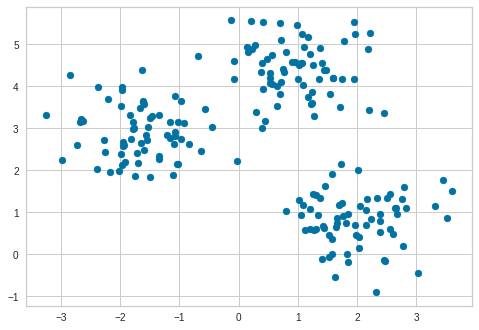

(200, 2)


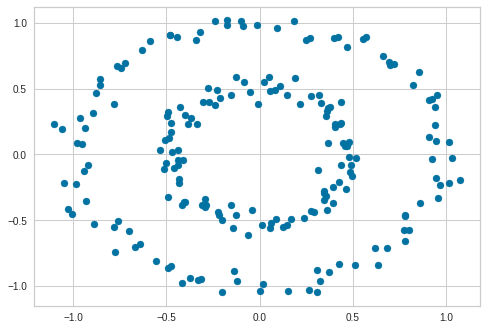

(200, 2)


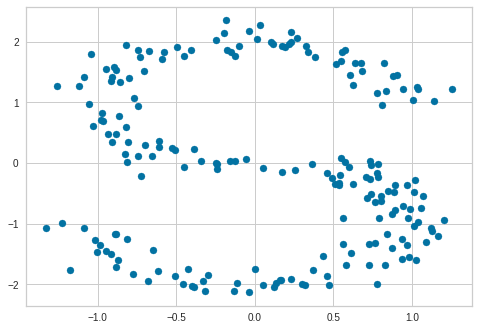

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


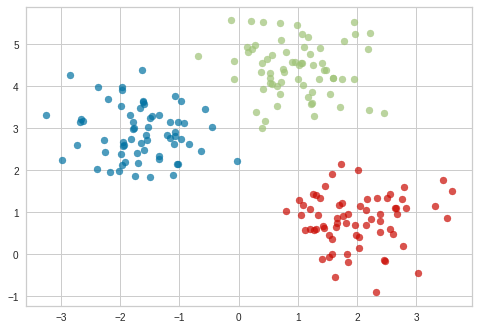

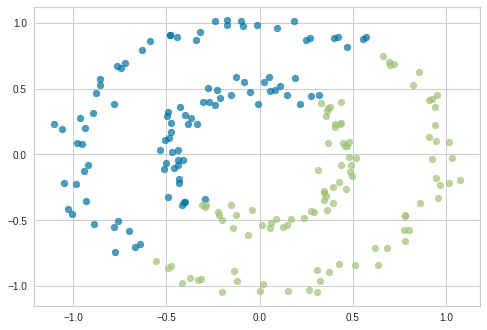

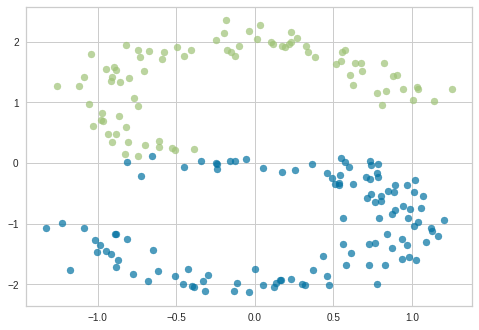

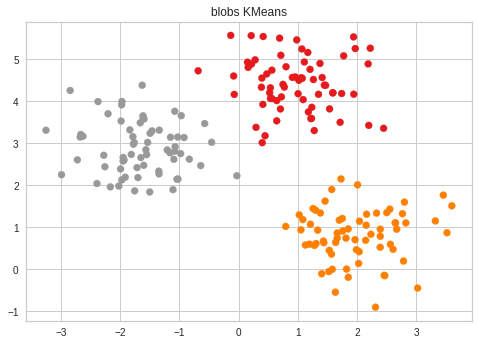

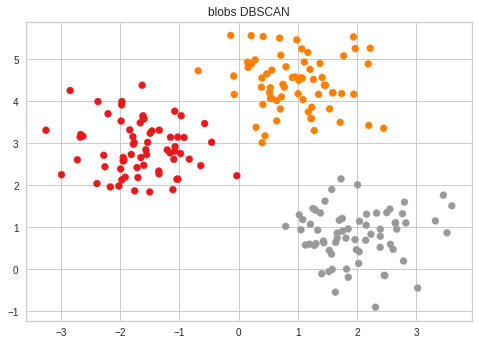

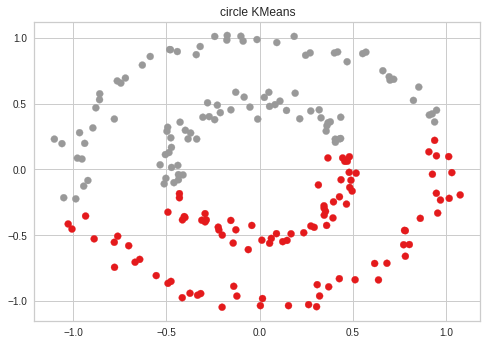

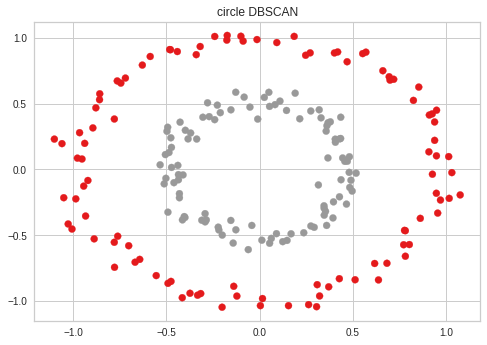

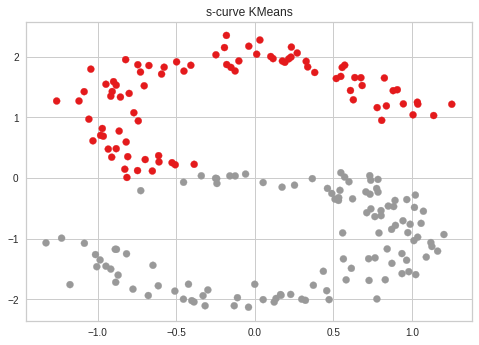

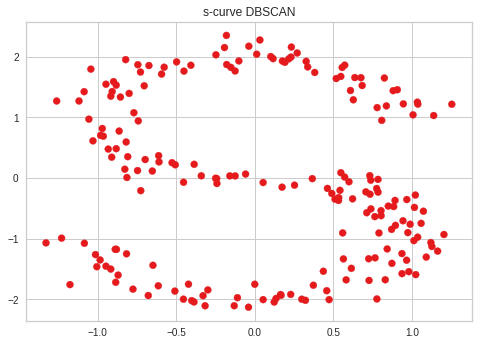

In [ ]:
rs = 0
nSamples = 200
nFeatures = 2
Xs = [
      make_blobs(nSamples, nFeatures, cluster_std=0.65, random_state=rs)[0],
      make_circles(nSamples, noise=0.05, factor=0.5, random_state=rs)[0],
      make_s_curve(nSamples, noise=0.15, random_state=rs)[0][:, [0, 2]],]

#plot the datasets
for X in Xs:
  print(X.shape)
  plt.scatter(X[:, 0], X[:, 1])
  plt.show()

#cluster the datasets using SOM
for X, nC in zip(Xs, [3, 2, 2]):
  som_shape = (nC, 1)
  som = MiniSom(som_shape[0], som_shape[1], 2)
  som.train_batch(X, 500)
# each neuron represents a cluster
  winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
  cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
  for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
  plt.show()

  
#cluster the datasets using kmeans and dbscan
for name, X, nC, eps in zip(
    ['blobs', 'circle', 's-curve'],
    Xs,
    [3, 2, 2],
    [0.8, 0.2, 0.8],
    ):
  for model in [
                KMeans(nC, random_state=rs),
                DBSCAN(eps=eps, min_samples=1),
                ]:
                predLabels = model.fit_predict(X)
                plt.scatter(X[:, 0], X[:, 1], c=predLabels,cmap='Set1')
                plt.title(
                    f'{name} '
                    f'{model.__class__.__name__}'
                )
                plt.show()

In [ ]:
X_digits, y_digits =load_digits(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X_digits, y_digits)
_, dim=X_digits.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


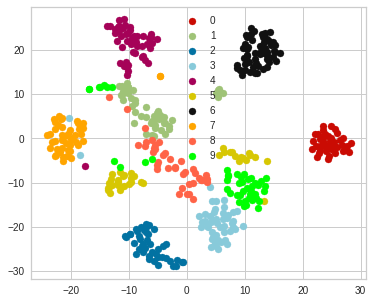

In [ ]:
#method-1
data=X_test                               #change this for different plotting
data_labels=y_test                        #change this for different plotting
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(data)  

#plot tsne for x_test and x_train
classes=unique_labels(data_labels)         
target_ids = range(len(classes))
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange' , 'tomato' , 'lime'
for i, c, label in zip(target_ids, colors, classes):
    plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
    #print(i)
    #print(data_labels)
    #print(X_2d[data_labels == i, 0])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


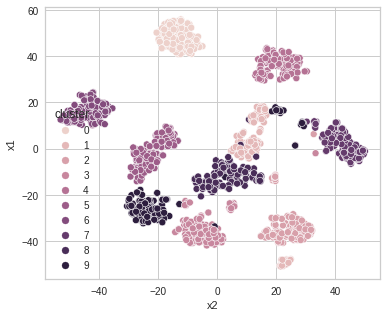

In [ ]:
#method-2
data=X_train                               #change this for different plotting
data_labels=y_train                    #change this for different plotting
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(data)  
dftsne = pd.DataFrame(X_2d)
dftsne['cluster'] = data_labels 
dftsne.columns = ['x1','x2','cluster']

plt.figure(figsize=(6, 5))
sns.scatterplot(data=dftsne,x='x2',y='x1',hue='cluster',legend="full",alpha=1)

In [ ]:
for model in [
        KMeans(10, random_state=rs),
        DBSCAN(eps=27.65, min_samples=1),
        SOM(10, n=1, dim=dim),
    ]:
        predLabels = model.fit_predict(X_digits)
        score = silhouette_score(X_digits, predLabels, random_state=rs)
        print(f'{model.__class__.__name__}: '
              f'Silhouette Score = {score}; ')

In [ ]:
model = KMeans(10,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(X_digits)        # Fit the data to the visualizer
visualizer.draw()

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=rs), X_digits, k=(2,35),metric='silhouette',timings=False)  

pass


In [ ]:
c=[]
t=[]
ncList=[]
accList=[]

#the next two def funtions are used to calculate the accuracy for unsupervised learning methods ONLY IF THE USED DATASET IS LABELD
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    for label in unique_labels(labels):
        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        trueLabel = unique[np.argmax(count)]
        labelDict[label] = trueLabel
    return labelDict


def usLabels2sLabels(labels, y):
    sLabels = np.empty(labels.shape, labels.dtype)
    labelDict = unsupervisedLabelMap(labels, y)
    for usl, tl in labelDict.items():
        sLabels[labels == usl] = tl
    return sLabels

rng=range(2,35)
for r in rng:
  model= SOM(m=r, n=1, dim=dim)
  predClusters = model.fit_predict(X_digits)
  predY = usLabels2sLabels(predClusters, y_digits)
  accuracy = accuracy_score(y_digits, predY)
  score = silhouette_score(X_digits, predClusters, random_state=rs)
  c.append(model.inertia_/len(X_digits))
  t.append(score)
  ncList.append(r)
  accList.append(accuracy)

#plot number of neurons/number of clusters vs inertia score
plt.plot(rng,c)
plt.xlabel("number of neurons")
plt.ylabel("inertia")
plt.show


In [ ]:
#plot number of neurons/number of clusters vs silhoutte score
plt.plot(rng,t)
plt.xlabel("number of neurons")
plt.ylabel("Silhouette")
plt.show

In [ ]:
#plot number of neurons/number of clusters vs accuracy score
plt.stem(accList)
plt.xlabel("number of clusters")
plt.ylabel("Accuracy")
plt.show

In [ ]:
#find DBSCAN optimal eps and min-samples 
epsList, msList, accList = list(), list(), list()
for eps in tqdm(np.arange(15, 30, 0.5)):
  for ms in range(2, 10):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(X_digits)
    score = silhouette_score(X_digits, predLabels, random_state=rs)
    epsList.append(eps)
    msList.append(ms)
    accList.append(score)
epsList, msList, accList = np.array(epsList), np.array(msList), np.array(accList)

In [ ]:
#plot min-samples vs silhouette score
plt.stem(msList,accList)
plt.xlabel("min_samples")
plt.ylabel("Silhouette")
plt.show

In [ ]:
#plot eps vs silhouette score
plt.stem(epsList,accList)
plt.xlabel("eps")
plt.ylabel("Silhouette")
plt.show

In [ ]:
#baseline (without supervising)
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

In [ ]:
#after supervising
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=10)),  #trying changing this to 50 or 90 and observe the difference in accuracy
    ("log_reg", LogisticRegression(solver='lbfgs', max_iter=10000))
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))